# <font color='red'>Classification on MNIST (part 2B: my first CNN)</font>

Import Classes and Functions

In [1]:
#numpy
import numpy as np
#sklearn
import sklearn
# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Import dataset

In [2]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


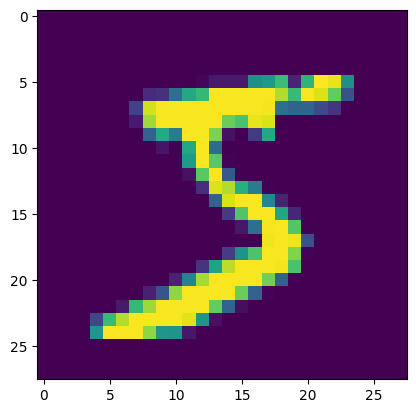

In [3]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

Data preprocessing

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
#OLD from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

In [7]:
y_train[0]

5

In [8]:
y_train_OHE[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Build the model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [10]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## <font color='red'>ATTENTION</font>

<font color='red'>_The execution of the next cell will trigger model training. On a CPU 1 epoch takes few minutes, same locally or on colab.. and - if you are running locally - your CPU will surely start heating up, the fan will turn on at 50-ish% of 1st epoch, python process at >100% CPU soon, etc.. Make sure you set "epochs" to a very low value. E.g. 1 is ok to start.. then read later!_</font>

In [ ]:
%%time
#train the model
model.fit(X_train, y_train_OHE, validation_data=(X_test, y_test_OHE), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 173s 90ms/step - loss: 0.2168 - accuracy: 0.9550 - val_loss: 0.1081 - val_accuracy: 0.9682
Epoch 2/3
1875/1875 [==============================] - 151s 80ms/step - loss: 0.0617 - accuracy: 0.9817 - val_loss: 0.0665 - val_accuracy: 0.9795
Epoch 3/3
 895/1875 [=============>................] - ETA: 1:14 - loss: 0.0349 - accuracy: 0.9887

While training (and perhaps burning your local CPU!) check how the accuracy goes up (cell above, right-hand side).

After few epochs, you should get a decent accuracy on the validation set. That’s a very good start!

**Congratulations, you have built a working CNN for MNIST!**

## <font color='red'>Exercise</font>

[THIS MUST BE DONE ON COLAB]

Try to "change runtime type", select a GPU, reset all variables, clean all output and re-run the entire notebook so far. Focus on the cell above, where the training happens. Compare the time it takes to run 1 epoch on CPU vs GPU (vs TPU). If you do all correctly, conclusions should be self-explanatory!

Hint: `%%time` as cell magic to automatically compute how it takes to run a cell.

## Make predictions

Predict first 4 images in the test set:

In [ ]:
model.predict(X_test[:4])

This is the model prediction for the first four images. Let’s compare this with the actual labels (the truth):

In [ ]:
y_test_OHE[:4]

In [ ]:
y_test[0]

In [ ]:
y_test[1]

In [ ]:
y_test[2]

In [ ]:
y_test[3]

Did the model predicted correctly?